In [2]:
import numpy as np
from sympy import *
# https://www.grund-wissen.de/informatik/python/scipy/sympy.html

In [37]:
# based on Chapter 2 Eq. 2.1 f
E_0, lambda_, x, sigma, y, gamma, z, phi = symbols('E_0 lambda_ x sigma, y gamma z phi')

E_v = E_0 * (lambda_ * x + sigma * y + gamma * z)
pprint(Eq(0, E_v))

d_x = diff(E_v, x)
d_y = diff(E_v, y)
d_z = diff(E_v, z)

gradient_E_v = d_x + d_y + d_z

pprint(Eq(0,gradient_E_v))
pprint(Eq(0,simplify(gradient_E_v)))

0 = E₀⋅(γ⋅z + λ⋅x + σ⋅y)
0 = E₀⋅γ + E₀⋅λ + E₀⋅σ
0 = E₀⋅(γ + λ + σ)


In [38]:
# based on chapter 2 fig. 2.1 and 2.2

theta = -1/2 * E_0 * lambda_ * (x**2 - y**2)

pprint(Eq(phi,theta))



              ⎛ 2    2⎞
φ = -0.5⋅E₀⋅λ⋅⎝x  - y ⎠


charges
q_1 =  -1.602176634e-19 x =  0.5 y =  0.5
q_2 =  1.602176634e-19 x =  0.5 y =  -0.5
q_3 =  -1.602176634e-19 x =  -0.5 y =  -0.5
q_4 =  1.602176634e-19 x =  -0.5 y =  0.5


<ipython-input-29-70c9f32c2561>:58: RuntimeWarning: divide by zero encountered in true_divide
  k_1 = q_1 / (r_1*r_1*r_1)
<ipython-input-29-70c9f32c2561>:59: RuntimeWarning: divide by zero encountered in true_divide
  k_2 = q_2 / (r_2*r_2*r_2)
<ipython-input-29-70c9f32c2561>:60: RuntimeWarning: divide by zero encountered in true_divide
  k_3 = q_3 / (r_3*r_3*r_3)
<ipython-input-29-70c9f32c2561>:61: RuntimeWarning: divide by zero encountered in true_divide
  k_4 = q_4 / (r_4*r_4*r_4)
<ipython-input-29-70c9f32c2561>:67: RuntimeWarning: invalid value encountered in multiply
  E_x = k_C * (k_1 * (q_1_x - x) + k_2 * (q_2_x - x) + k_3 * (q_3_x - x) + k_4 * (q_4_x - x));
<ipython-input-29-70c9f32c2561>:68: RuntimeWarning: invalid value encountered in multiply
  E_y = k_C * (k_1 * (q_1_y - y) + k_2 * (q_2_y - y) + k_3 * (q_3_y - y) + k_4 * (q_4_y - y));


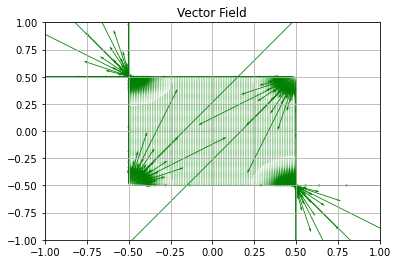

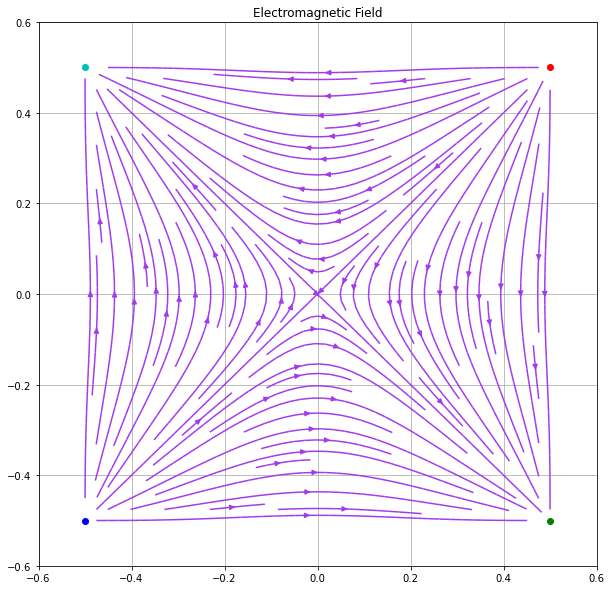

In [29]:
# example

import numpy as np
# for physical cosntants
import scipy.constants as const
# for plots
import matplotlib.pyplot as plt

# charge settings
N_1 = -1
N_2 = 1
N_3 = -1
N_4 = 1

# coulomb constant
k_C = 1 / (4 * np.pi * const.epsilon_0)

# charges
q_1 = N_1 * const.e
q_2 = N_2 * const.e
q_3 = N_3 * const.e
q_4 = N_4 * const.e


# position of the charged points
q_1_x = 0.5
q_1_y = 0.5
q_2_x = 0.5
q_2_y = - 0.5
q_3_x = -0.5
q_3_y = -0.5
q_4_x = -0.5
q_4_y = 0.5



print('charges')
print('q_1 = ', q_1, 'x = ', q_1_x, 'y = ', q_1_y)
print('q_2 = ', q_2, 'x = ', q_2_x, 'y = ', q_2_y)
print('q_3 = ', q_3, 'x = ', q_3_x, 'y = ', q_3_y)
print('q_4 = ', q_4, 'x = ', q_4_x, 'y = ', q_4_y)




# Meshgrid
size = 1
s = (size / 2)
n_s = 100
x, y = np.meshgrid(np.linspace(-s, s, n_s), 
                   np.linspace(-s, s, n_s))

# radius
r_1 = np.sqrt((q_1_x - x)**2 + (q_1_y - y)**2)
r_2 = np.sqrt((q_2_x - x)**2 + (q_2_y - y)**2)
r_3 = np.sqrt((q_3_x - x)**2 + (q_3_y - y)**2)
r_4 = np.sqrt((q_4_x - x)**2 + (q_4_y - y)**2)

# helper varables
k_1 = q_1 / (r_1*r_1*r_1)
k_2 = q_2 / (r_2*r_2*r_2)
k_3 = q_3 / (r_3*r_3*r_3)
k_4 = q_4 / (r_4*r_4*r_4)


# https://www.geeksforgeeks.org/how-to-plot-a-simple-vector-field-in-matplotlib/

# Directional vectors
E_x = k_C * (k_1 * (q_1_x - x) + k_2 * (q_2_x - x) + k_3 * (q_3_x - x) + k_4 * (q_4_x - x));
E_y = k_C * (k_1 * (q_1_y - y) + k_2 * (q_2_y - y) + k_3 * (q_3_y - y) + k_4 * (q_4_y - y));
  
# Plotting Vector Field with QUIVER
plt.quiver(x, y, E_x, E_y, color='g')
plt.title('Vector Field')

# Setting x, y boundary limits
boundary = 1
plt.xlim(-boundary, boundary)
plt.ylim(-boundary, boundary)
  
# Show plot with gird
plt.grid()
plt.show()

# Depict illustration
plt.figure(figsize=(10, 10))
plt.streamplot(x,y,E_x,E_y, density=1.4, linewidth=None, color='#A23BEC')
plt.plot(q_1_x,q_1_y,'-or')
plt.plot(q_2_x,q_2_y,'-og')
plt.plot(q_3_x,q_3_y,'-ob')
plt.plot(q_4_x,q_4_y,'-oc')
plt.title('Electromagnetic Field')
  
boundary = 0.6
plt.xlim(-boundary, boundary)
plt.ylim(-boundary, boundary)

# Show plot with gird
plt.grid()
plt.show()
